## Bayesian inference I - exercise 1 - regression
1. Download data from https://datahub.io/core/co2-ppm#resource-co2-mm-mlo. This is a time series of atmospheric CO2 concentrations from 1958 onwards; the second column gives the date of the sample (in decimal form, input value), while the third is concentration in parts per million (output).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
data=np.array(pd.read_csv("co2-mm-mlo_csv.csv",header=1))

In [21]:
pd.DataFrame(data)

,0,1,2,3,4,5
0,1958-04-01,1958.292,317.45,317.45,315.29,-1
1,1958-05-01,1958.375,317.5,317.5,314.71,-1
2,1958-06-01,1958.458,-99.99,317.1,314.85,-1
3,1958-07-01,1958.542,315.86,315.86,314.98,-1
4,1958-08-01,1958.625,314.93,314.93,315.94,-1
...,...,...,...,...,...,...
721,2018-05-01,2018.375,411.24,411.24,407.91,24
722,2018-06-01,2018.458,410.79,410.79,408.49,29
723,2018-07-01,2018.542,408.71,408.71,408.32,27
724,2018-08-01,2018.625,406.99,406.99,408.9,30


2. Fit the data using Bayesian regression in the following forms:
- 2a. linear regression
- 2b. basis function regression with basis functions $1,t,t^2$
- 2c. gaussian process regression with squared exponential covariance $k(t_1,t_2)=a^2 \exp\Bigl[-\frac{(t_1-t_2)^2}{\lambda^2}\Bigr]$ with $\lambda=a=1$ (try smaller $\lambda$)

For all three scenarios, take the observation error $\sigma^2=1$ and compute the predictive distribution on a grid of points covering the range of the inputs $\pm 5$, using as training data:
- 70% randomly selected input/output pairs
- the first 70% of input/output pairs in chronological order.

Plot the predictive mean and mean $\pm$ standard deviation; evaluate in the two cases the mean squared test error of the mean prediction, and the mean of the squared errors divided by the predictive variance.  

2a. linear regression

[  2   6  70  71  72 212 312]
(719, 6)


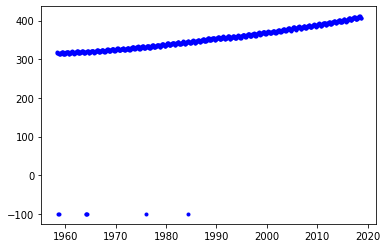

In [22]:
sigma2=1
# range of inputs:
plt.plot(data[:,1],data[:,2],'.b')
#plt.ylim([300,450])

# remove outliers (if you wish):
print(np.argwhere(data[:,2]<0)[:,0])
data=np.delete(data,np.argwhere(data[:,2]<0)[:,0],axis=0)
print(np.shape(data))


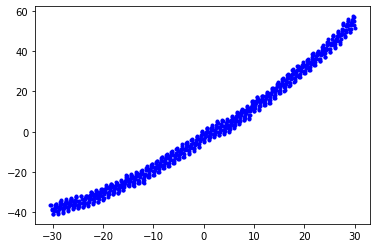

In [23]:
# center the data
data[:,1]=data[:,1]-np.mean(data[:,1])
data[:,2]=data[:,2]-np.mean(data[:,2])

plt.plot(data[:,1],data[:,2],'.b')

In [27]:
randomize=np.arange(len(data[:,1]))
np.random.shuffle(randomize)

data=data[np.argsort(randomize)]

print(len(data[:,1]))
n_train=np.int(70/100*len(data[:,1]))
print(n_train)

train_x=data[:n_train,1]
train_y=data[:n_train,2]
test_x=data[n_train:,1]
test_y=data[n_train:,2]

719
503


/tmp/ipykernel_10616/853843975.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_train=np.int(70/100*len(data[:,1]))


In [29]:
cov=1/(1+1/sigma2*np.sum(data[:,1]**2))
mu=cov*np.sum(data[:,1]*data[:,2])

print(cov)
print(mu)

4.593808987429383e-06
1.5550608414379483


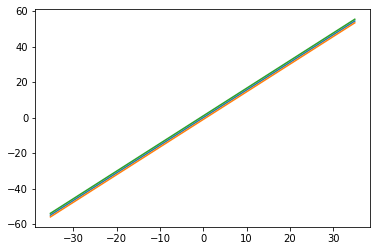

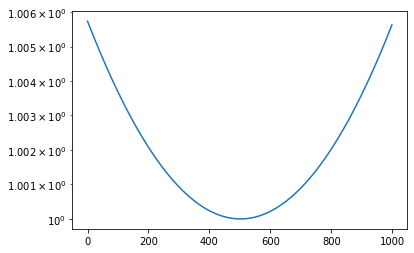

In [51]:
grid=np.linspace(np.min(train_x)-5,np.max(train_x)+5,1000)
predict_mean=mu*grid
predict_var=sigma2+cov*grid**2

#print(predict_mean)
#print(predict_var)

#predict=1/(np.sqrt(2*np.pi*predict_var))*np.exp(-(grid-predict_mean)**2/predict_var)

plt.figure(0)
plt.plot(grid,predict_mean)
plt.plot(grid,predict_mean-predict_var)
plt.plot(grid,predict_mean+predict_var)
#print(np.pi())

plt.figure(1)
plt.plot(predict_var)
plt.yscale('log')

basis functions regression

In [56]:
phi=np.array([np.ones(len(train_x)),train_x,train_x**2])
phistar=np.array([np.ones(len(grid)),grid,grid**2])

av_basf=1/sigma2*phistar.T*cov*phi*train_y

plt.plot(av_basf)

ValueError: operands could not be broadcast together with shapes (1000,3) (3,503) 